<a href="https://colab.research.google.com/github/SriKrishnaMishra/Machine-Learning/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset - https://www.kaggle.com/datasets/yasserh/titanic-dataset



###*** i working in this project into 4 things are types : also ***

###Part 1: 4 Key Things in Titanic (with NB)

> Male vs Female survival rate predictions

> 1NB will clearly show: females → higher probability of survival.

> Example: ~74% of women survived vs ~19% of men (real data).

> So in predictions, NB will strongly rely on Sex.

###Class-based survival odds

> 1st class passengers had much better odds than 3rd class.

> NB will capture this from the categorical Pclass feature.

###Limitations of Naïve Bayes

>Assumes independence → but Titanic features are correlated (e.g., Pclass and Fare go together).

> Continuous features (Age, Fare) may not really follow a Gaussian distribution.

> Baseline comparison with Logistic Regression

> Logistic Regression usually performs a bit better (~80–83% accuracy).

> But Naïve Bayes is faster and simpler.




🔹 Part 2: Benefits of Different Naïve Bayes Types in Titanic



###Gaussian Naïve Bayes (GNB)

> Best for continuous data like Age and Fare.

> Assumes features follow a normal distribution.

> Titanic use-case: Predicting survival based on age/fare fits better here.

###Multinomial Naïve Bayes (MNB)

Works best for count-based features (word counts, number of occurrences).

Titanic use-case: Not very natural here, but you could discretize continuous features (e.g., bucket Age into groups like child, adult, senior) and apply MNB.

###Bernoulli Naïve Bayes (BNB)

> Best for binary features (yes/no, 0/1).

> Titanic use-case: Features like Sex (male/female), Survived (0/1), IsAlone (yes/no if family aboard) can be modeled well.

> It’s useful if you convert the dataset into mostly 0/1 features.

### Import Libraries & Load Data

In [2]:
import pandas as pd
import numpy as np

### Load & Preview Data

In [4]:
df = pd.read_csv("/content/Naive Bayes dataset.zip")

# Quick look
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Clean & Preprocess

In [9]:
# Drop columns not useful for prediction
columns_to_drop = ["PassengerId","Name","Ticket","Cabin"]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)

# Fill missing values
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Encode categorical features
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df["Sex"] = label.fit_transform(df["Sex"])
df["Embarked"] = label.fit_transform(df["Embarked"])

print(df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


### Data Visualization

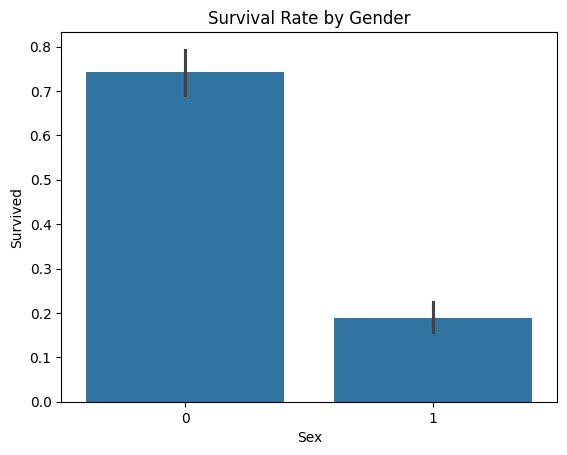

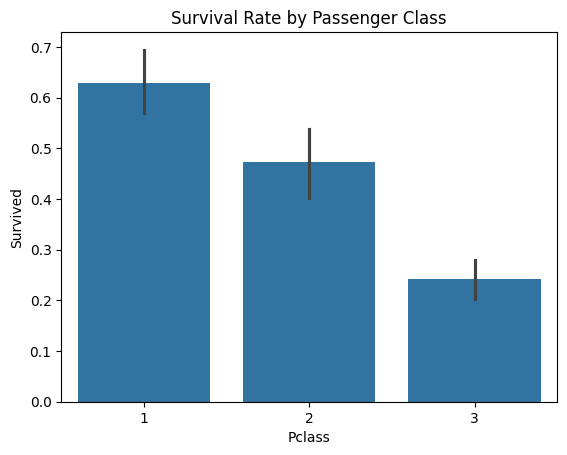

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival rate by Sex
#male = 1 or female = 0
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()

# Survival rate by Pclass
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

### Train/Test Split

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score

X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Gaussian Naïve Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# Cross-validation
cv_scores_nb = cross_val_score(nb, X, y, cv=5)
print("Naïve Bayes CV Accuracy:", cv_scores_nb.mean())


Naïve Bayes Accuracy: 0.776536312849162
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179

Naïve Bayes CV Accuracy: 0.7901512773837174


### Logistic Regression (Baseline)

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Cross-validation
cv_scores_lr = cross_val_score(lr, X, y, cv=5)
print("Logistic Regression CV Accuracy:", cv_scores_lr.mean())


Logistic Regression Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Logistic Regression CV Accuracy: 0.7890025735986442


### Confusion Matrix Visualization

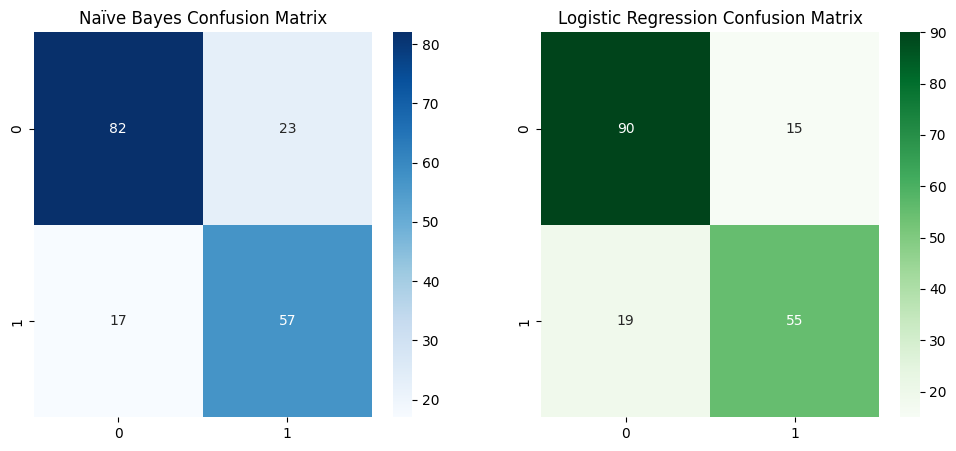

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap="Blues", ax=axes[0])
axes[0].set_title("Naïve Bayes Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap="Greens", ax=axes[1])
axes[1].set_title("Logistic Regression Confusion Matrix")

plt.show()
